#Project Description
<p>The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).</p>
<p>Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.</p><br>
<p>The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.</p><br>
<p>The classification goal is to predict the likelihood of a liability customer buying personal
loans.</p>


##1.Importing the Datasets and Libraries

In [2]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [4]:
#Read the excel file 
df=pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx")

In [5]:
#to display first 5 rows of the dataset
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#to display the last 5 rows of the dataset
df.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


##2.Checking the types of data and basic summary statistics

In [7]:
#to display the types of data and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
#to display the statistical summary of the dataset 
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#to check sum of null values in the dataset
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
#to check if there is any null values in the attributes of dataset
df.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [11]:
#to display the shape of the dataset
df.shape

(5000, 14)

In [12]:
#types of data in dataset
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

##2.Dropping irrevalent columns
<p>From the above statistical summary we came up with the observation that the column 'Experience' contains faulty values and column 'ID' doesn't affect the dataset.So,we drop those columns from the dataset and also correlated the 'Experience' column with 'Age' column.

In [13]:
exp=df['Experience']
age=df['Age']
correl=exp.corr(age)
correl

0.9942148569683321

In [14]:
df=df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


##Exploratory Data Analysis

In [15]:
#number of unique in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

ZIP Code has 467 distinct values.It is a nominal variable which has too many levels.It is better to drop Zip Code column as well.

In [16]:
df.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [17]:
#Number of people with 0 mortgage
##There are 3462 people with 0 mortgage out of 5800(making it skewed)
(df.Mortgage==0).sum()

3462

In [18]:
##Number of people with 0 credit card spending per month
##There are 106 people with 0 average credit card spending per month
(df.CCAvg==0).sum()

106

In [19]:
##Value count for all the categorical columns
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [20]:
## value count for the education column
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [21]:
## value count for Securities Account column
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [22]:
## value count for CD Account column
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
## value count for CreditCard column
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [24]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

##Univariate Analysis

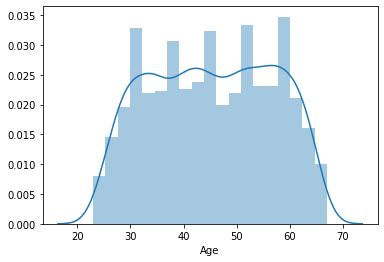

In [25]:
# Univariate Analysis
# Age seems to have symmetric distribution
sns.distplot(df.Age)

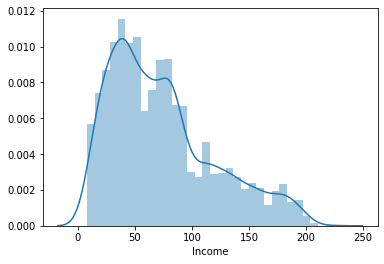

In [26]:
# Income is right skewed distriution
sns.distplot(df.Income)

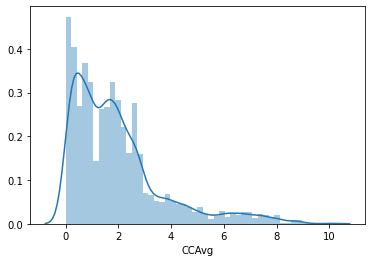

In [27]:
# Credit Card Average is right skewed
sns.distplot(df.CCAvg)

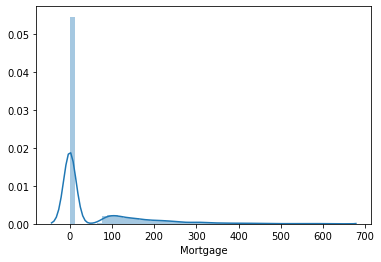

In [28]:
# Mortgage seems to have highly skewed
sns.distplot(df.Mortgage)

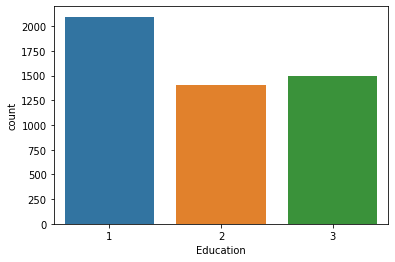

In [29]:
sns.countplot(df.Education)

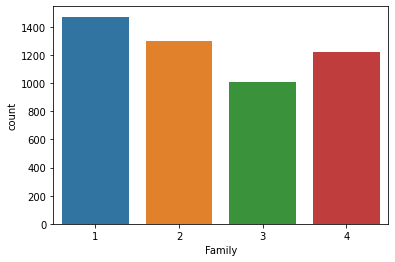

In [30]:
sns.countplot(df.Family)

##Multivariate Analysis

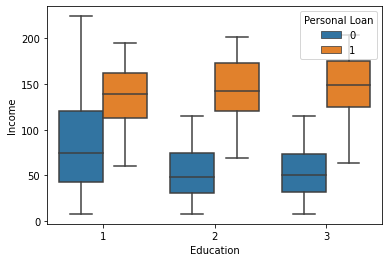

In [31]:
## Customers who has more income are granted loans across all education level
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

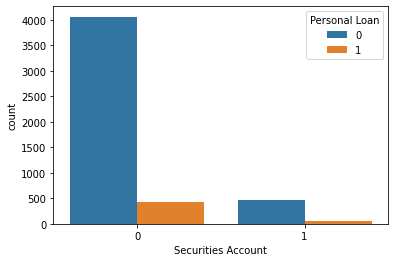

In [32]:
## Majority of people have Securities Account don't have personal loan
sns.countplot(x='Securities Account',hue='Personal Loan',data=df)

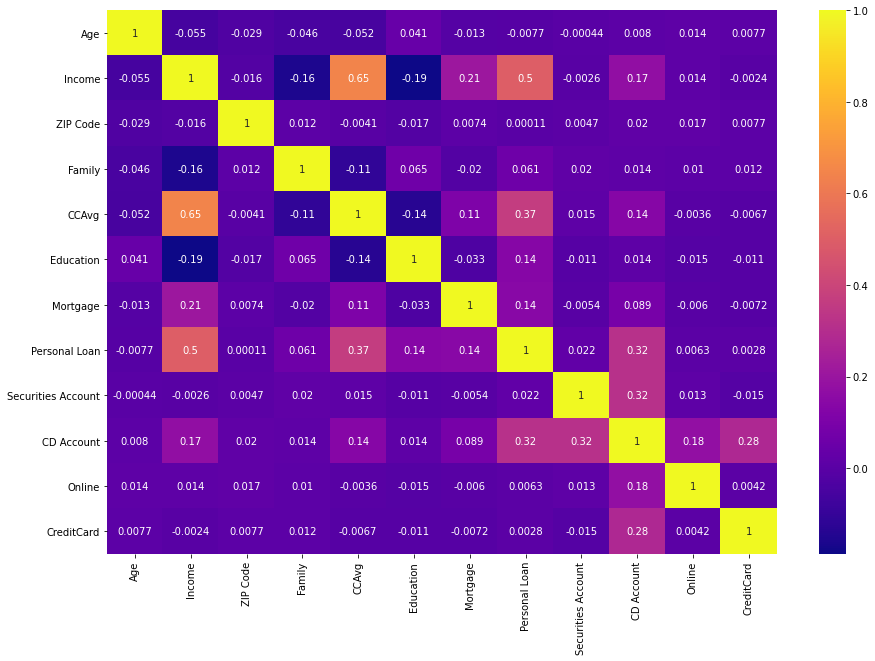

In [33]:
## after dropping Education column earlier doesn't seem to be significant correlation between other variables except
## credit card average and income
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

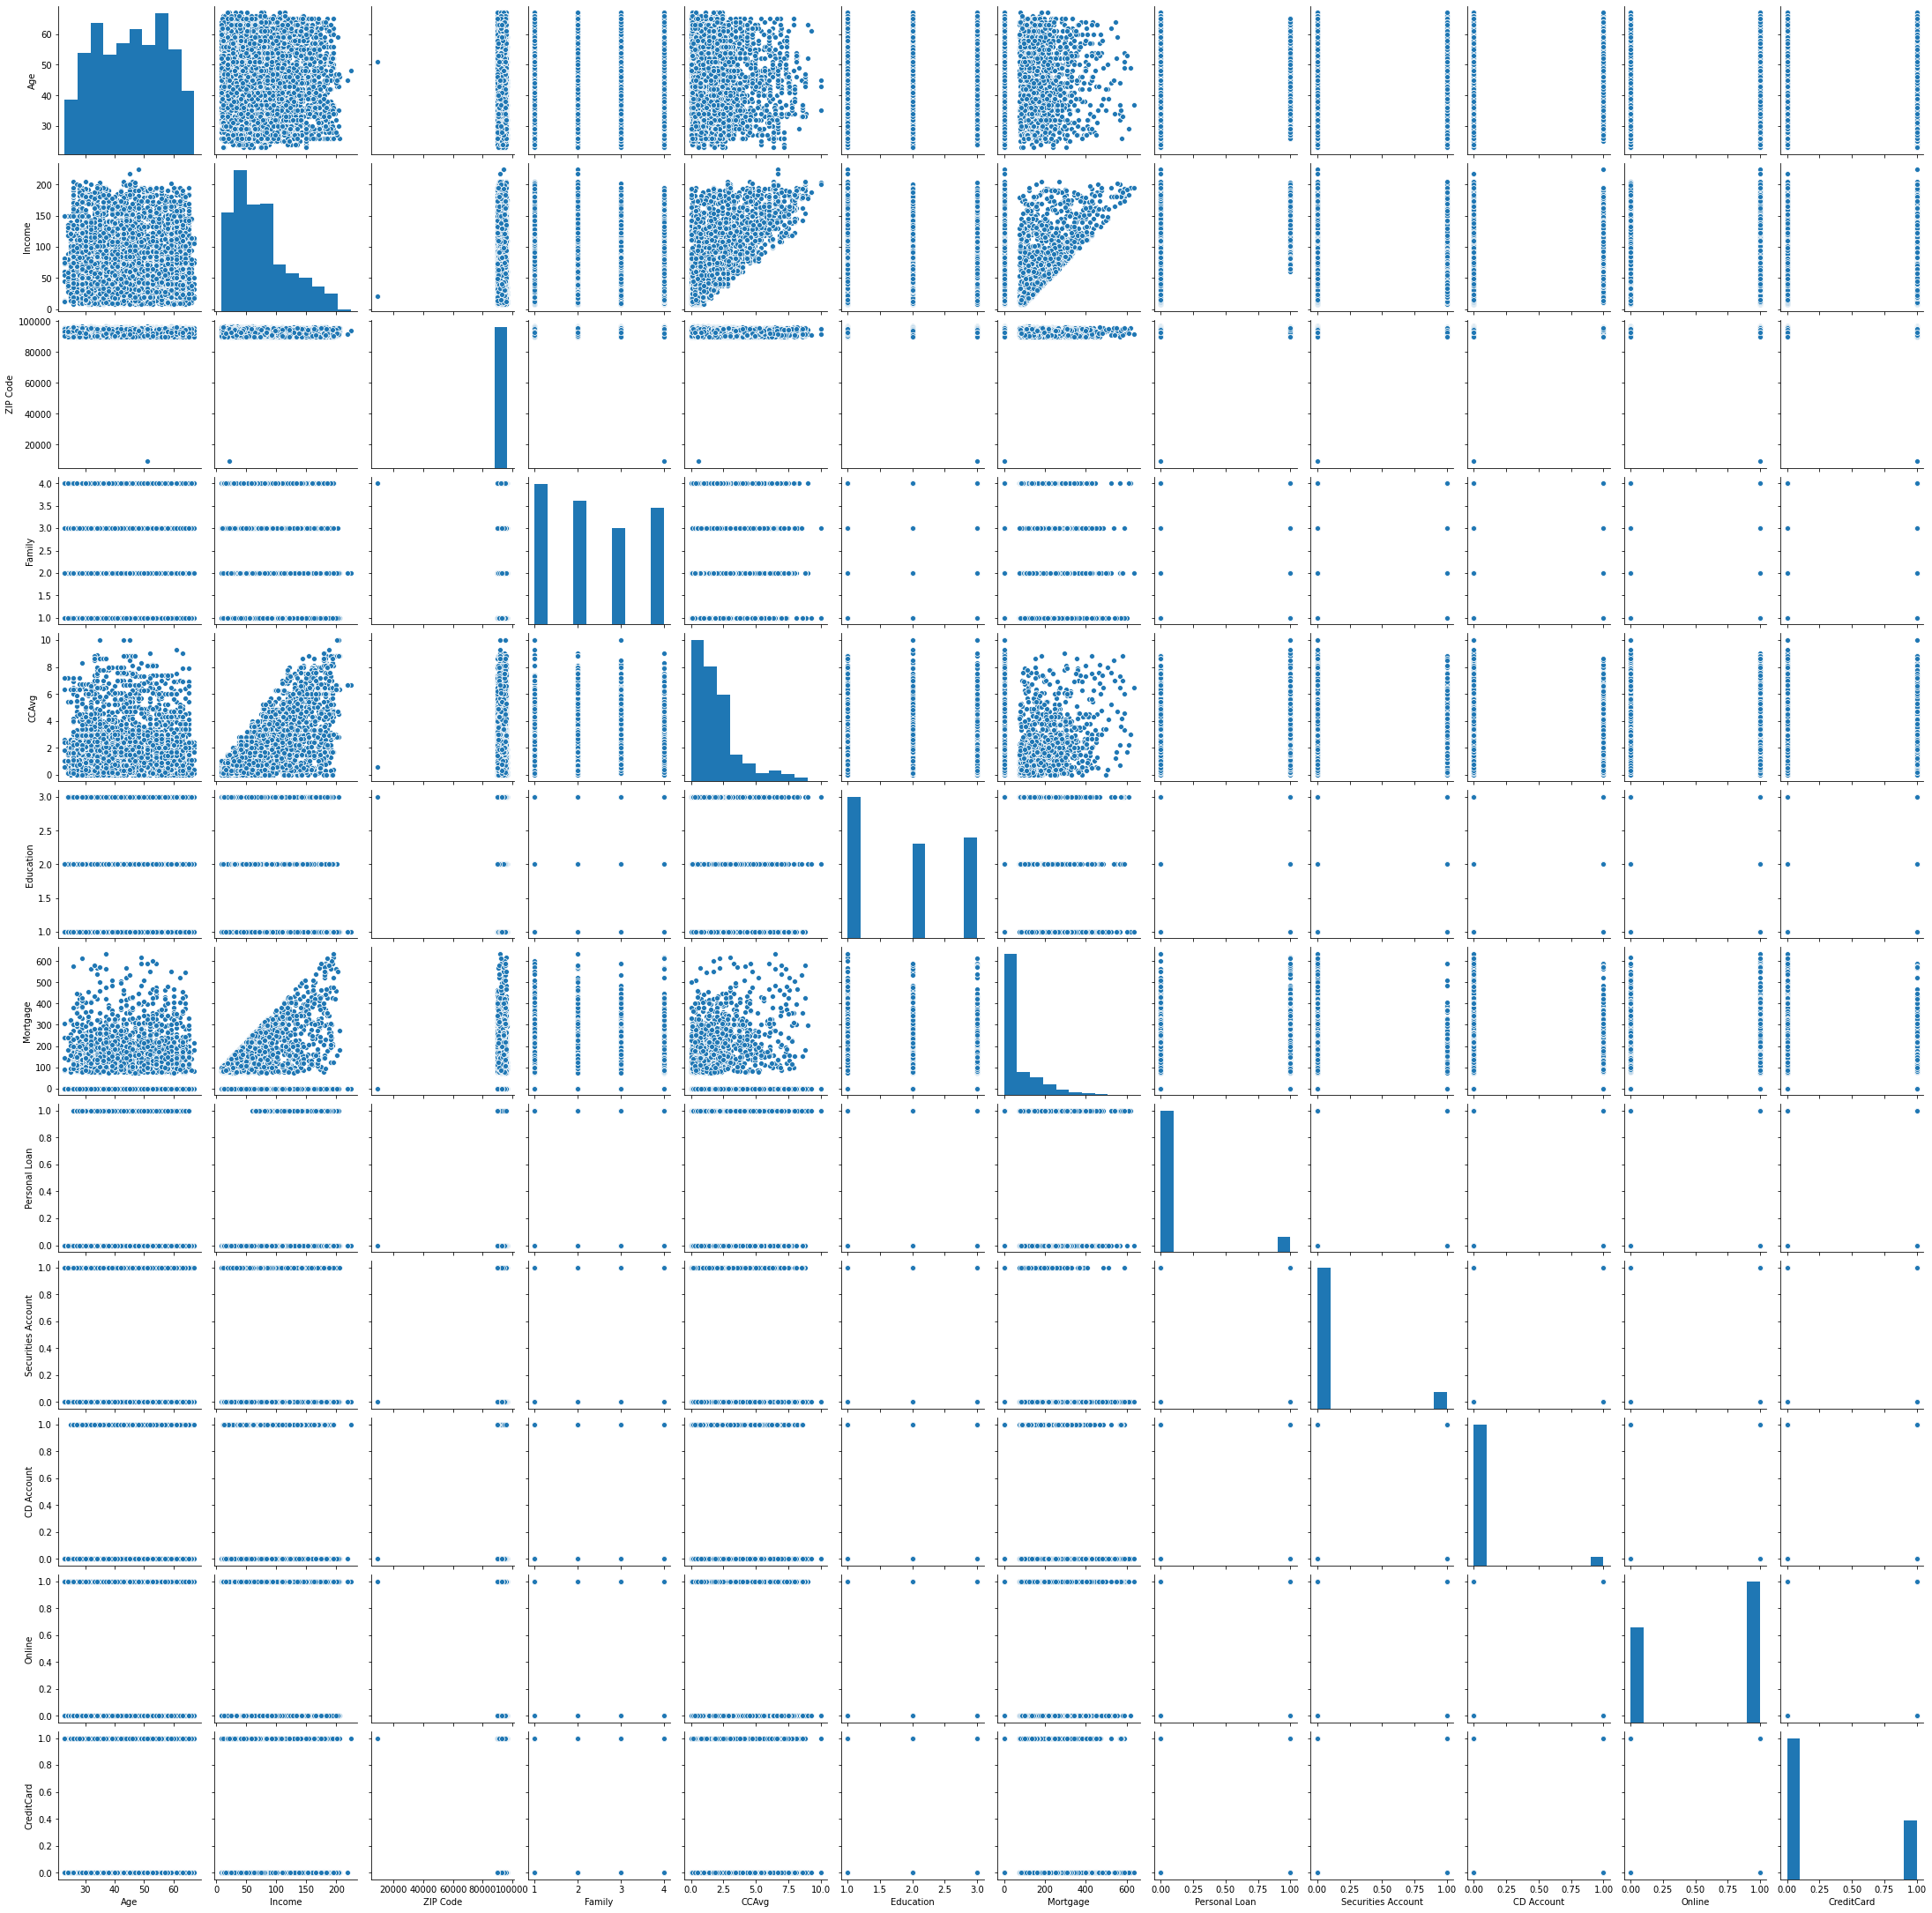

In [34]:
sns.pairplot(df)

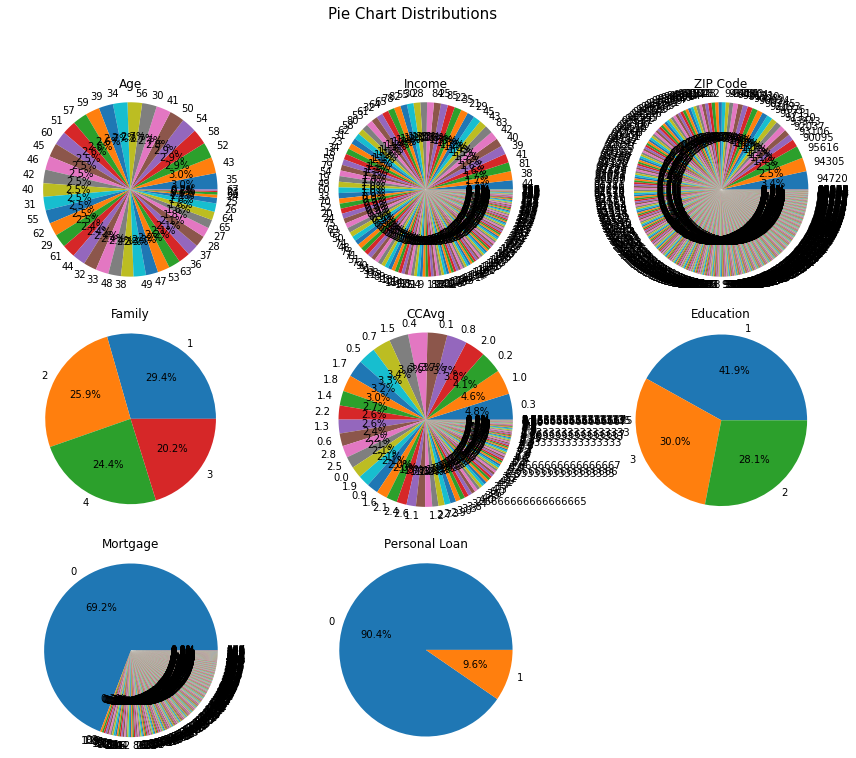

In [35]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=15)
for i in range(1, df.shape[1]//2 + 3):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df.columns.values[i - 1])
    values = df.iloc[:, i - 1].value_counts(normalize = True).values
    #Normalize presents data in percentages
    index = df.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal') #X and Y Axes are abstracted by this line

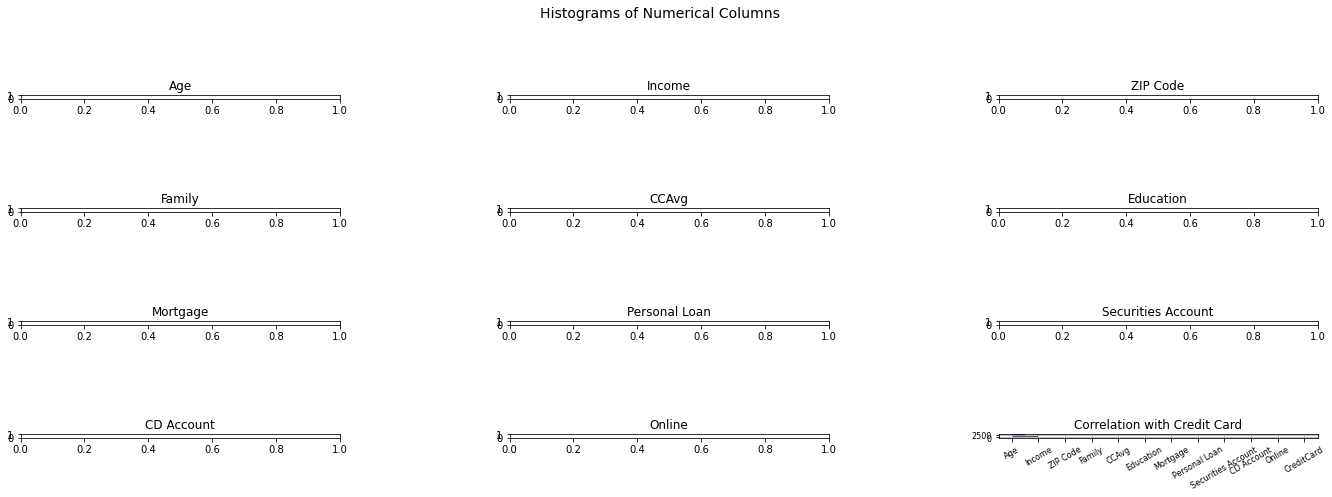

In [45]:
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Histograms of Numerical Columns', fontsize=14)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()#gca stands for get current axes
    f.set_title(df.columns.values[i])
#the vals variable holds all the uniqe values of the column and
#also helps tp sacle the graph. lets say u are ploting for age
#100 then vals not only identifies the unique age with100 values 
#but also scales the graphs according to it
    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
#the condition is to make sure that it doesnt take much time
#to plot the graphs at the same time ensuring that ur system does not crash
#depending upon how powerfull ur system is. So if the unique values in vals exceed 100
#the bins would be defaulted to 100. 
plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
## Correlation with Response Variable (Note: Models like RF 
#are not linear like these)
#corrwith creates a corelation within the columns 
#bar creats the bargraph
df.corrwith(df.CreditCard).plot.bar(
        figsize = (20, 10), title = "Correlation with Credit Card", fontsize = 8,
        rot = 30, grid = True, color='red' )
#just play with the numbers to better fit the graph in your screen
#the negative and positive side of the graph shows the relation between the variable and the target
#negative means inverse and positive means direct relation
#in this the target is e-sign

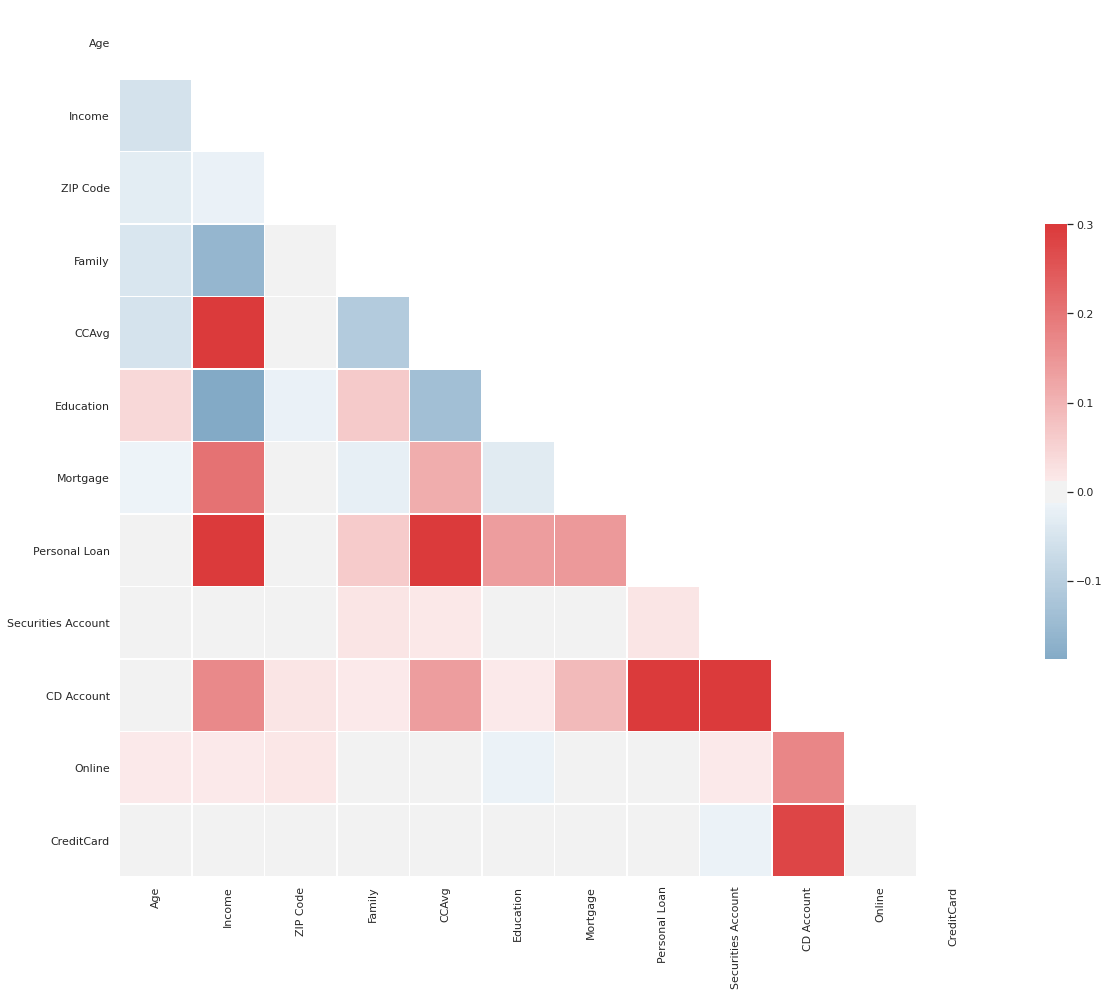

In [46]:
## Correlation Matrix
#set -Set the aesthetic style of the plots. the parameters are style and rc basically make the backgroud
#style is the kind of plot we will get it can changed to dark,ticks,whitegrid etc also its kind of a dictionary
#rc- Parameter mappings to override the values in the preset seaborn style dictionaries. 
#This only updates parameters that are considered part of the style definition.
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 12, as_cmap=True)
#cmap is short for colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
data_X=df.loc[:,df.columns!= "Personal Loan"]
data_y=df[["Personal Loan"]]

##Transformation for the Feature Variables

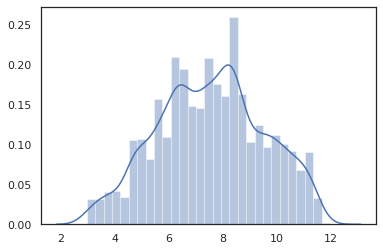

In [48]:
#import PowerTransformer to normalize the skewed columns of dataset
from sklearn.preprocessing import PowerTransformer

#applied the yeo-johnson method to normalize the Income column
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
tmp=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(tmp)

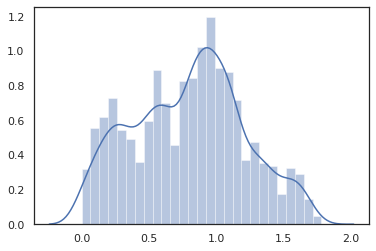

In [49]:
#applied the yeo-johnson method to normalize the Credit Card Average column
pnt=PowerTransformer(method="yeo-johnson",standardize=False)
pnt.fit(data_X["CCAvg"].values.reshape(-1,1))
tmp=pnt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(tmp)

In [50]:
#drop the Mortgage column as it is highly skewed and replace it with Mortgage_Int column
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

In [51]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


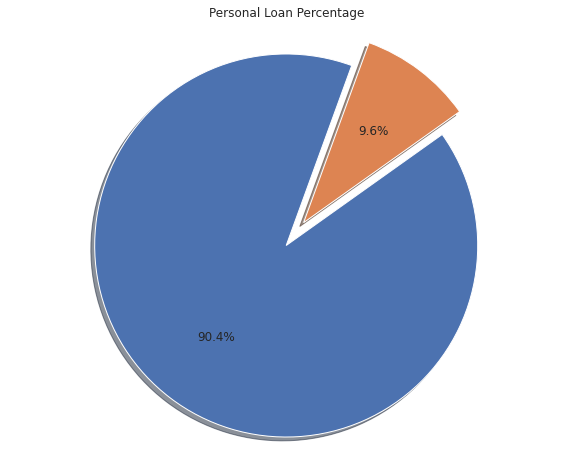

In [52]:
##Univariate Analysis
##only 9.6% of all applicants get approved for the loan
tempDF=pd.DataFrame(df["Personal Loan"].value_counts().reset_index())
tempDF.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal Loan"],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Personal Loan Percentage")
plt.show()

##Splitting into Train and Test set using stratified sampling

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_X,data_y,test_size=0.3,stratify=data_y,random_state=0)

In [54]:
#Encoding the categorical data
from sklearn.preprocessing import OneHotEncoder
Onehotencoder_y=OneHotEncoder()
data_y=Onehotencoder_y.fit_transform(data_y)

##Scaling the Data

In [55]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

##Logistic Regression Model

In [56]:
#import Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, ..., 0, 0, 0])

##Apply the metrics for evaluation

In [57]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))
print("F1 Score: ",metrics.f1_score(y_test,y_pred))
print("ROC AUC Score",metrics.roc_auc_score(y_test,y_pred))

Accuracy:  0.9513333333333334
Precision:  0.8256880733944955
Recall:  0.625
F1 Score:  0.7114624505928855
ROC AUC Score 0.8054941002949852


## Classifier for the model

In [58]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred=classifier.predict(X_test)
y_pred
y_pred_1=classifier.predict(X_train)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# Predicting Test Set
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score
acc_test= accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)# tp / (tp + fp)
rec = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [61]:
results = pd.DataFrame([['Logistic Regression', acc_test,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train', 'Precision', 'Recall', 'F1 Score','ROC_AUC_Score_t'])
results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score_t
0,Logistic Regression,0.951333,0.952,0.825688,0.625,0.711462,0.805494


In [62]:
## SVM (Linear Kernel)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc_test= accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [64]:
model_results = pd.DataFrame([['SVM (Linear)', acc_test,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train', 'Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,SVM (Linear),0.95,0.955714,0.85567,0.576389,0.688797,0.783032


In [65]:
results = results.append(model_results, ignore_index = True)

In [66]:
## SVM (RBF Kernel)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc_test = accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [68]:
model_results = pd.DataFrame([['SVM (RBF)', acc_test,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train', 'Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,SVM (RBF),0.978667,0.98,0.974576,0.798611,0.877863,0.898199


In [69]:
results = results.append(model_results, ignore_index = True)

In [70]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc= accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [72]:
model_results = pd.DataFrame([['Naive Bayes: ', acc,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train','Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,Naive Bayes:,0.886667,0.88,0.435,0.604167,0.505814,0.760417


In [73]:
results = results.append(model_results, ignore_index = True)

In [74]:
## KNN Model
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc= accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [76]:
model_results = pd.DataFrame([['KNN: ', acc,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train','Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,KNN:,0.961333,0.966857,0.947917,0.631944,0.758333,0.814129


In [77]:
results = results.append(model_results, ignore_index = True)

In [78]:
# Neural Network Model using MLPClassifier that trains using BackPropagation
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=100)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [79]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc= accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [80]:
model_results = pd.DataFrame([['Neural Network: ', acc,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train','Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,Neural Network:,0.979333,0.982,0.900709,0.881944,0.891228,0.93581


In [81]:
results = results.append(model_results, ignore_index = True)

In [82]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0,max_depth=8)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [83]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc= accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [84]:
model_results = pd.DataFrame([['Decision Tree ', acc,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train','Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,Decision Tree,0.98,0.996,0.913043,0.875,0.893617,0.933075


In [85]:
results = results.append(model_results, ignore_index = True)

In [86]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators =500,max_depth=8,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [87]:
y_pred = classifier.predict(X_test)
y_pred_1=classifier.predict(X_train)
acc = accuracy_score(y_test, y_pred)
acc_train=accuracy_score(y_train,y_pred_1)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test,y_pred)

In [88]:
model_results = pd.DataFrame([['Random Forest (n=500)', acc,acc_train, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test','Accuracy_Train', 'Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

,Model,Accuracy_Test,Accuracy_Train,Precision,Recall,F1 Score,ROC_AUC_Score
0,Random Forest (n=500),0.987333,0.994571,0.977099,0.888889,0.930909,0.943338


In [89]:
results = results.append(model_results, ignore_index = True)

##Optimizing the Model

In [90]:
#K-Fold Cross Validation with 10 folds
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))
#the gibrish numbers are nothing but the value of mean of accuracy and plus or minus  standard deviation times 2
#this line will take some time depending upon the machine u are working on


### Parameter Tuning
# pip install joblib
# conda install joblib

# Applying Grid Search

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}
#we are checking in the different variation of numerical values 
#in the parameters of random forest classifier

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Random Forest Classifier Accuracy: 0.98 (+/- 0.01)


In [91]:
import time
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,#from k-fold validation
                           n_jobs = -1)#to use the entire core of the machine

t0 = time.time()#just to check how much time it takes to excute the program
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Took 1233.90 seconds


In [92]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=500, GSx2 + Entropy)', acc, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test', 'Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])
model_results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Took 337.69 seconds


,Model,Accuracy_Test,Precision,Recall,F1 Score,ROC_AUC_Score
0,"Random Forest (n=500, GSx2 + Entropy)",0.986667,0.955882,0.902778,0.928571,0.949176


In [93]:
results = results.append(model_results, ignore_index = True)

In [94]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Took 1203.45 seconds


(0.9865714285714287,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [95]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Took 256.59 seconds


(0.9851428571428572,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 12,
  'min_samples_split': 2})

In [96]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)


model_results = pd.DataFrame([['Random Forest (n=500, GSx2 + Gini)', acc, prec, rec, f1,roc]],
               columns = ['Model', 'Accuracy_Test', 'Precision', 'Recall', 'F1 Score','ROC_AUC_Score'])

model_results

,Model,Accuracy_Test,Precision,Recall,F1 Score,ROC_AUC_Score
0,"Random Forest (n=500, GSx2 + Gini)",0.982,0.933333,0.875,0.903226,0.934181


In [97]:
results = results.append(model_results, ignore_index = True)

Test Data Accuracy: 0.9820


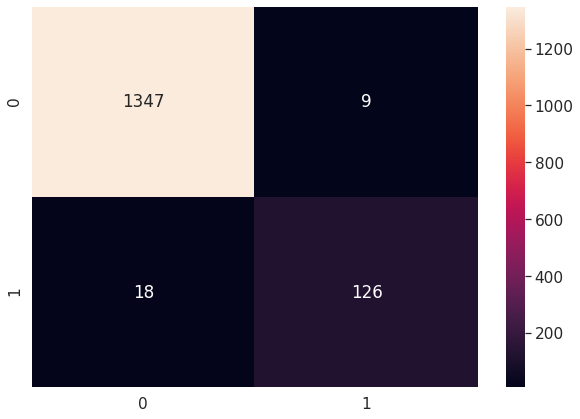

In [98]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test['Personal Loan'], y_pred))

#Conclusion
<br>
1.In the first step of our project we imported various libraries and also our dataset through which we checked the datatypes of the dataset,statistical summary of the dataset,shape of dataset,null values in the dataset etc.

2.We have to make the model to predict that applicants will take Personal Loan or not.

3.We found that Age and Experience column were highly correlated and so we dropped the Experience column.

4.The ID and ZIP Code column were not affecting factors for a person to take a loan or not.

5.Income and CCAvg column were right skewed so we applied Power Transformation to them to normlize them.

6.The Mortage column was highly right skewed and discrete so rather than applying Power Transformation we used the Binning Technique.


Then we used various models to make certain predictions:-

Logistic Regression
->Accuracy Score of Test set:- 95.13%

->Accuarcy Score of Train Set:-95.2%

->Precision Score:-82.568%

->Recall Score:-62.5%

->F1 Score:-71.14%

->Roc Auc Score:-80.54%

SVM(Linear Kernel)
->Accuracy Score of Test set:- 95%

->Accuarcy Score of Train Set:-95.57%

->Precision Score:-85.56%

->Recall Score:-57.63%

->F1 Score:-68.87%

->Roc Auc Score:-78.30%

SVM(RBF Kernel)
->Accuracy Score of Test set:- 97.86%

->Accuarcy Score of Train Set:-98%

->Precision Score:-97.4%

->Recall Score:-79.8%

->F1 Score:-87.78%

->Roc Auc Score:-89.81%

Naive Bayes
->Accuracy Score of Test set:- 88.66%

->Accuarcy Score of Train Set:-88%

->Precision Score:-43.5%

->Recall Score:-60.41%

->F1 Score:-50.58%

->Roc Auc Score:-76.04%

KNN
->Accuracy Score of Test set:- 96.13%

->Accuarcy Score of Train Set:-96.68%

->Precision Score:-94.79%

->Recall Score:-63.19%

->F1 Score:-75.83%

->Roc Auc Score:-81.14%

Neural Network(MLF Classifier)
->Accuracy Score of Test set:- 97.93%

->Accuarcy Score of Train Set:-98.57%

->Precision Score:-91.2%

->Recall Score:-86.8%

->F1 Score:-88.96%

->Roc Auc Score:-92.96%

Decision Tree
->Accuracy Score of Test set:- 98%

->Accuarcy Score of Train Set:-99.6%

->Precision Score:-91.3%

->Recall Score:-87.5%

->F1 Score:-89.36%

->Roc Auc Score:-93.30%

Random Forest
->Accuracy Score of Test set:- 98.73%

->Accuarcy Score of Train Set:-99.45%

->Precision Score:-97.70%

->Recall Score:-88.88%

->F1 Score:-93.09%

->Roc Auc Score:-94.33%


After analyzing the classification models we have observed that metrics of Random Forest Classifier attains the highest scores so we improved the model by applying certain optimization techniques:-

Optimization using K-Fold Cross Validation
Applying 10-Fold cross validation we obtain:-

Accuracy Score:- 98(+/- 0.01)%

Optimization using Grid Search Cross-Validation(Criterion:-Entropy)
->Accuracy Score of Test set:- 98.66%

->Precision Score:-95.58%

->Recall Score:-90.27%

->F1 Score:-92.8%

->Roc Auc Score:-94.91%

Optimization using Grid Search Cross-Validation(Criterion:-Gini)
->Accuracy Score of Test set:- 98.2%

->Precision Score:-93.33%

->Recall Score:-87.5%

->F1 Score:-90.32%

->Roc Auc Score:-93.41%

After the Optimizations we obtain the final result as:-

--> Test Accuracy Score:-98.2%